# 画像検索評価システム

In [1]:
import matplotlib.pyplot as plt
import pickle

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## ユークリッド距離計算

In [3]:
import numpy as np

def distance(x, y):
  return np.sqrt(np.sum((x - y) ** 2, axis=-1))

import numpy as np
a = np.array((1, 2, 3))
b = np.array((4, 5, 6))

dist = np.sqrt(np.sum(np.square(a-b)))

print(dist)

## 近いベクトルを探索，正答率

最も近い上位num件のベクトルのインデックス

In [4]:
def top_index(v, vecs, num):
  return np.argsort(distance(v, vecs))[:num]

- 上位num件
- ラベルが同じか確認する
- 同じものがいくつあるかカウントする

In [16]:
def evaluate_ratio(vecs, num_top=5):
  numSameLabel = 0
  numSameindex = 0
  
  for i, vec in enumerate(vecs):
    top_index_list = top_index(vec, vecs, num_top)
    for index in top_index_list:
      if index != i and y_test[i] == y_test[index]:
        numSameLabel += 1
      if index == i:
        numSameindex += 1
      numEvaluate = len(vecs) * num_top - numSameindex
  return numSameLabel / numEvaluate

## 次元数に応じた評価

### 10次元

In [23]:
with open('cifar10_vecs10.pickle', 'rb') as f:
  vecs10 = pickle.load(f)

In [24]:
evaluate_ratio(vecs10)

0.16126421515730058

### 100次元

In [25]:
with open('cifar10_vecs100.pickle', 'rb') as f:
  vecs100 = pickle.load(f)

In [26]:
evaluate_ratio(vecs100)

0.35615

### 500次元

In [27]:
with open('cifar10_vecs500.pickle', 'rb') as f:
  vecs500 = pickle.load(f)

In [28]:
evaluate_ratio(vecs500)

0.2692

### 1000次元

In [29]:
with open('cifar10_vecs1000.pickle', 'rb') as f:
  vecs1000 = pickle.load(f)

In [30]:
evaluate_ratio(vecs1000)

0.415975

### 2000次元

In [31]:
with open('cifar10_vecs2000.pickle', 'rb') as f:
  vecs2000 = pickle.load(f)

In [32]:
evaluate_ratio(vecs2000)

0.3831

### 3000次元

In [33]:
with open('cifar10_vecs3000.pickle', 'rb') as f:
  vecs3000 = pickle.load(f)

In [34]:
evaluate_ratio(vecs3000)

0.394325

### 4096次元

In [35]:
with open('cifar10_vecs4096.pickle', 'rb') as f:
  vecs4096 = pickle.load(f)

In [36]:
evaluate_ratio(vecs4096)

0.369625

## 今までのまとめ

### 10次元


In [18]:
with open('cifar10_vecs10.pickle', 'rb') as f:

  vecs = pickle.load(f)

In [10]:
vecs.shape

(10000, 10)

In [20]:
evaluate(vecs)

0.15542

In [19]:
evaluate_ratio(vecs)

0.16126421515730058

In [7]:
score = evaluate_sum(vecs)

- 30

In [12]:
score

50201

- 5

In [8]:
score

9583

In [14]:
(score-10000) /(300000-10000) *100

13.862413793103448

In [20]:
(score) /(50000) *100

19.166

### 100次元

In [ ]:
with open('cifar10_vecs100.pickle', 'rb') as f:
  vecs = pickle.load(f)

scoreにカウントした数を格納

In [ ]:
score = evaluate_sum(vecs)

In [ ]:
score

24246

- 割合

- 10000引いているのは，同じ画像も含まれてしまっているため．

In [ ]:
(score-10000) /(50000-10000) *100

35.615

### 500次元

In [13]:
with open('cifar10_vecs500.pickle', 'rb') as f:
  vecs = pickle.load(f)

In [ ]:
score = evaluate_sum(vecs)

In [ ]:
score

20768

In [ ]:
(score-10000) /(50000-10000) *100

26.919999999999998

### 1000次元

In [ ]:
with open('cifar10_vecs1000.pickle', 'rb') as f:
  vecs = pickle.load(f)

In [ ]:
score = evaluate_sum(vecs)

In [ ]:
score

26639

In [ ]:
(score-10000) /(50000-10000) *100

41.5975

### 2000次元

In [ ]:
with open('cifar10_vecs2000.pickle', 'rb') as f:
  vecs = pickle.load(f)

In [ ]:
score = evaluate_sum(vecs)

In [ ]:
score

25324

In [ ]:
(score-10000) /(50000-10000) *100

38.31

### 3000次元


In [ ]:
with open('cifar10_vecs3000.pickle', 'rb') as f:
  vecs = pickle.load(f)

In [ ]:
score = evaluate_sum(vecs)

In [ ]:
score

25773

In [ ]:
(score-10000) /(50000-10000) *100

39.4325

### 4096次元

In [ ]:
with open('cifar10_vecs4096.pickle', 'rb') as f:
  vecs = pickle.load(f)

In [ ]:
score = evaluate_sum(vecs)

In [ ]:
score

24785

In [ ]:
(score-10000) /(50000-10000) *100

36.9625

## 上位num件の画像を表示

[   0 5878 5876 5874 5873 5870 5869 5868 5867 5866 5865 5864 5862 5881
 5861 5859 5858 5856 5855 5853 5851 5850 5849 5848 5843 5842 5841 5860
 5840 5882]
[3]
[4]
[6]
[3]
[4]
[7]
[7]
[9]
[5]
[4]
[6]
[9]
[2]
[3]
[1]
[2]
[7]
[3]
[7]
[5]
[1]
[6]
[5]
[4]
[6]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


[7]
[6]
[0]
[2]
[1]


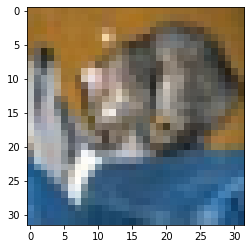

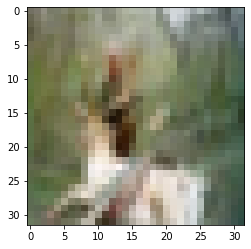

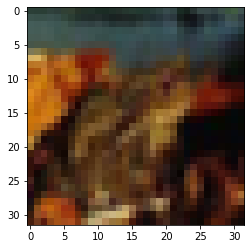

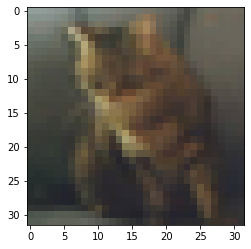

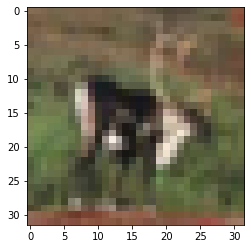

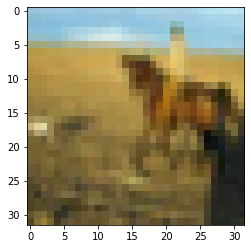

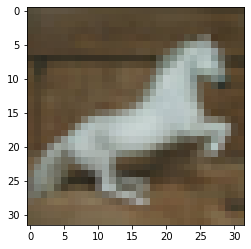

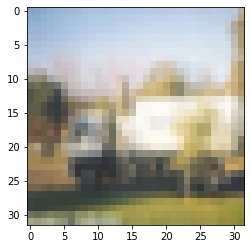

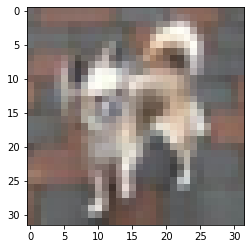

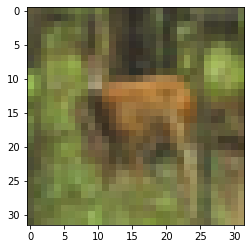

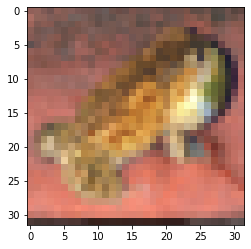

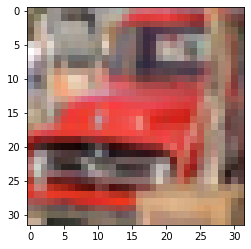

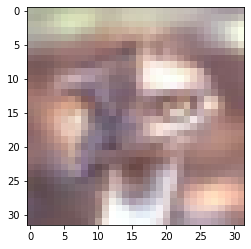

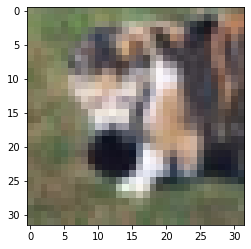

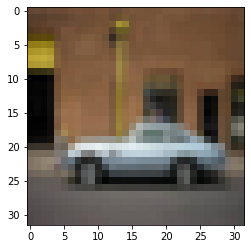

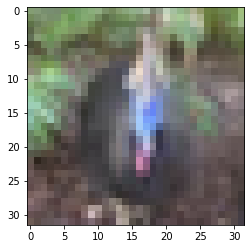

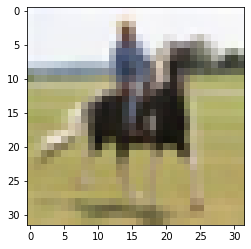

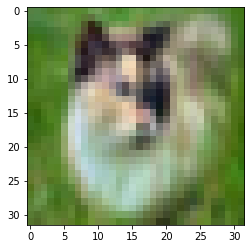

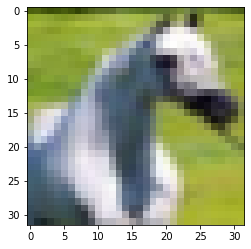

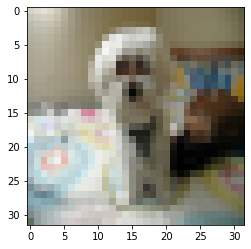

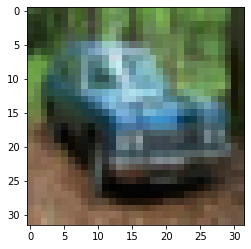

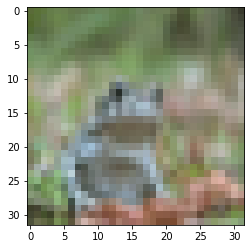

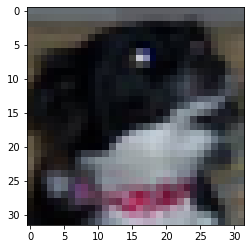

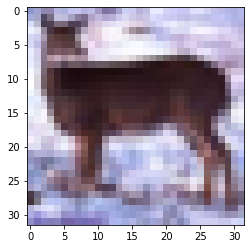

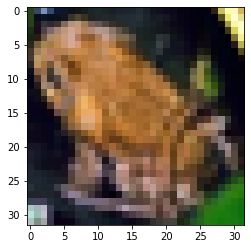

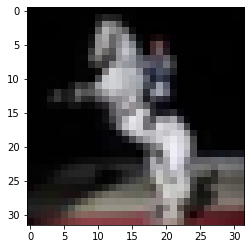

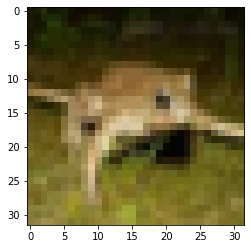

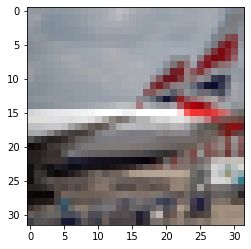

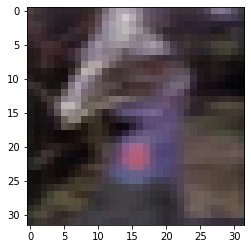

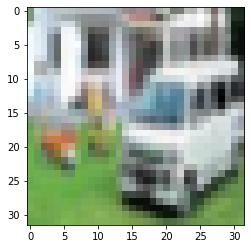

In [ ]:
top5 = top_index(vecs[0], vecs, 30)
print(top5)
for index in top5:
  plt.figure()
  plt.imshow(x_test[index])
  print(y_test[index])

## 下記は関係ない

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
y_test[9739 ]

array([1], dtype=uint8)

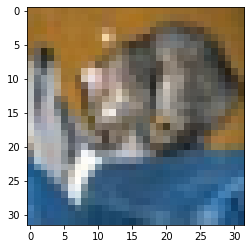

In [ ]:
plt.imshow(x_test[0])

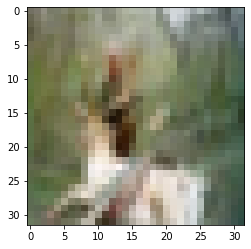

In [ ]:
plt.imshow(x_test[5878])

In [5]:
import numpy as np
def evaluate_sum(vecs):
  num = 5
  result = 0
  for j in range(0,10000):
    top5 = top_index(vecs[j], vecs, num)
    for index in top5:
      if y_test[j] == y_test[index]:
        result += 1
  return result

def evaluate(vecs, num_top=5):
  numSameLabel = 0
  numEvaluate = len(vecs) * num_top
  for i, vec in enumerate(vecs):
    top_index_list = top_index(vec, vecs, num_top)
    for index in top_index_list:
      if index == i:
        numEvaluate-=
        
        y_test[i] == y_test[index]:
        numSameLabel += 1

  return numSameLabel / numEvaluate
"""
    result = np.argsort(distance(vecs[j], vecs))
    for i in range(5):
      if y_test[j] == y_test[result[i]]:
        s += 1
      #plt.figure()
      #print(y_test[result])
      #plt.imshow(x_test[result[i]])
  return s
"""

'\n    result = np.argsort(distance(vecs[j], vecs))\n    for i in range(5):\n      if y_test[j] == y_test[result[i]]:\n        s += 1\n      #plt.figure()\n      #print(y_test[result])\n      #plt.imshow(x_test[result[i]])\n  return s\n'

## 1番近い画像ベクトルを探索

In [4]:
def search(v, vecs):
  b = distance(v, vecs[0])
  d = 0
  for i in range(0, len(vecs)):
    a = distance(v, vecs[i])
    if a < b:
      b = a
      d = i
  return d

In [5]:
#search(vecs[30], vecs)

In [6]:
#distance(vecs[0:10000], vecs)